<a href="https://colab.research.google.com/github/PriyathamVarma/LendingLoan/blob/main/OCR_FIRST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Imports
import pandas as pd
import numpy as np

import cv2
from google.colab.patches import cv2_imshow

In [1]:
# Inverted Images
# Rescaling
# Binarization
# Noise removal
# Dilation and Erosion
# Rotation/Deskewing
# Removing borders
# Missing Borders
# Transparency/Alpha channel

In [ ]:
# Preprocessing Images for ocr


In [2]:
#Load the dataset
#importing from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/tesseract.png"


In [21]:
# # Opening an image

# img = cv2.imread(path)
# img

In [19]:
# # To show the image as it is
# cv2.imshow("Image",img)
# # if we want the image to be delayed
# cv2.waitKey(0)

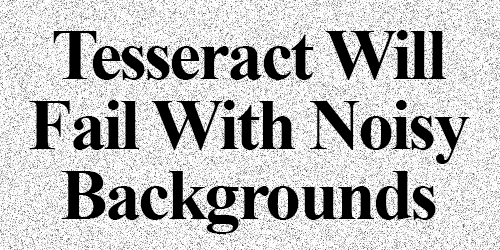

In [22]:
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [23]:
# To view the image as a array
img

array([[[251, 251, 251],
        [255, 255, 255],
        [243, 243, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [158, 158, 158]],

       [[255, 255, 255],
        [188, 188, 188],
        [222, 222, 222],
        ...,
        [246, 246, 246],
        [255, 255, 255],
        [204, 204, 204]],

       [[227, 227, 227],
        [255, 255, 255],
        [232, 232, 232],
        ...,
        [211, 211, 211],
        [255, 255, 255],
        [253, 253, 253]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [247, 247, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [226, 226, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [215, 215, 215],
        [255, 255, 255],
        [112, 112, 112]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [199, 199, 199],
        [235, 235, 235]]

In [128]:
# Rotation and deskewing
# https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

In [129]:
# Rotate the image around its center
def rotateImage(cvImage,angle:float):
  newImage = cvImage.copy()

  (h,w) = newImage.shape[:2]
  center = (w //2,h//2)
  M= cv2.getRotationMatrix2D(center, angle, 1.0)
  newImage = cv2.warpAffine(newImage,M,(w,h), flags = cv2.INTER_CUBIC, borderMode = cv2.BORDER_REPLICATE)
  return newImage

In [130]:
# Deskew image
def deskew(cvImage):
  angle = getSkewAngle(cvImage)
  return rotateImage(cvImage, -1.0 *angle)

In [131]:
fixed = deskew(img)

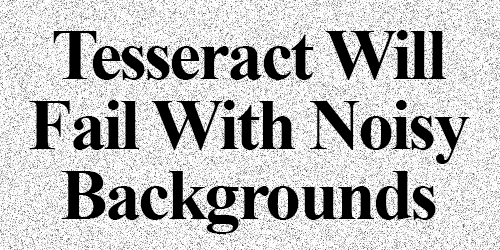

In [132]:
cv2_imshow(fixed)

In [133]:
# Inverted Images
inverted_image = cv2.bitwise_not(fixed)
inverted_image

array([[[  4,   4,   4],
        [  0,   0,   0],
        [ 12,  12,  12],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 97,  97,  97]],

       [[  0,   0,   0],
        [ 67,  67,  67],
        [ 33,  33,  33],
        ...,
        [  9,   9,   9],
        [  0,   0,   0],
        [ 51,  51,  51]],

       [[ 28,  28,  28],
        [  0,   0,   0],
        [ 23,  23,  23],
        ...,
        [ 44,  44,  44],
        [  0,   0,   0],
        [  2,   2,   2]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  8,   8,   8],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 29,  29,  29]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 40,  40,  40],
        [  0,   0,   0],
        [143, 143, 143]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 56,  56,  56],
        [ 20,  20,  20]]

In [134]:
cv2.imwrite("inverted.jpg",inverted_image)

True

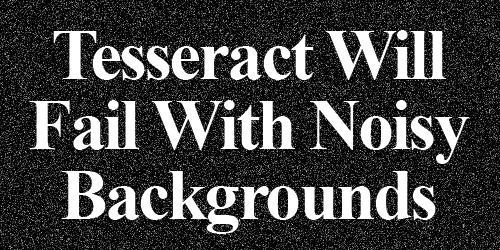

In [135]:
cv2_imshow(inverted_image)

In [136]:
# # RE-SCALING
# cv2.resize(img,50,50)

In [137]:
# Binarization
# Convert to gray scales

def grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [138]:
gray_image = grayscale(img)
cv2.imwrite("grayscaleImg.jpg",gray_image)

True

In [139]:
display(gray_image)

array([[251, 255, 243, ..., 255, 255, 158],
       [255, 188, 222, ..., 246, 255, 204],
       [227, 255, 232, ..., 211, 255, 253],
       ...,
       [255, 255, 247, ..., 255, 255, 226],
       [255, 255, 255, ..., 215, 255, 112],
       [255, 255, 255, ..., 255, 199, 235]], dtype=uint8)

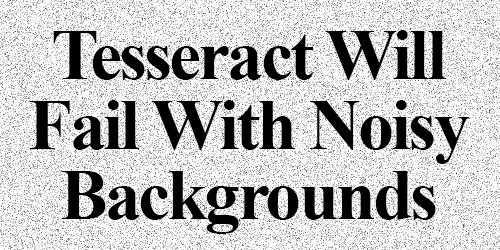

In [140]:
cv2_imshow(gray_image)

In [141]:
threshold, im_bw = cv2.threshold(gray_image,125, 255, cv2.THRESH_BINARY)

In [142]:
cv2.imwrite('bw_image.jpg',im_bw)

True

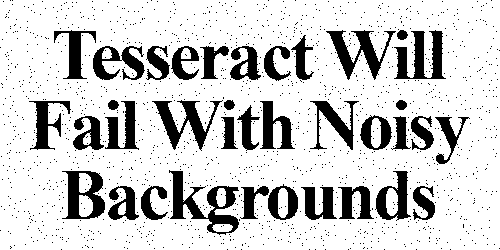

In [143]:
cv2_imshow(im_bw)

In [144]:
# Noise removal
def noise_removal(image):
  kernel = np.ones((1,1), np.uint8)

  image = cv2.dilate(image,kernel,iterations = 1)

  kernel = np.ones((1,1), np.uint8)

  image = cv2.erode(image,kernel,iterations = 1)

  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE , kernel)

  image = cv2.medianBlur(image,3)

  return (image)

In [145]:
no_noise = noise_removal(im_bw)

In [146]:
cv2.imwrite("no_noise.jpg",no_noise)

True

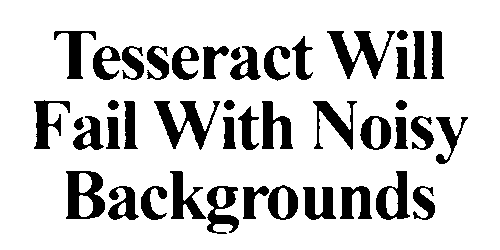

In [147]:
cv2_imshow(no_noise)

In [148]:
# Dilation and erosion
def thin_font(image):
  image = cv2.bitwise_not(image)
  kernel = np.ones((2,2),np.uint8)

  image = cv2.erode(image,kernel,iterations = 1)
  image = cv2.bitwise_not(image)

  return (image)

In [149]:
eroded_image = thin_font(no_noise)
cv2.imwrite("eroded_image.jpg",eroded_image)

True

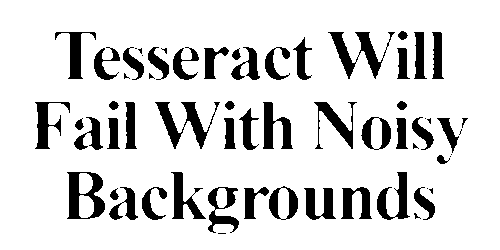

In [150]:
cv2_imshow(eroded_image)

In [151]:
def thick_font(image):
  image = cv2.bitwise_not(image)
  kernel = np.ones((2,2),np.uint8)

  image = cv2.dilate(image,kernel,iterations = 1)
  image = cv2.bitwise_not(image)

  return (image)

In [152]:
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated_image.jpg",dilated_image)

True

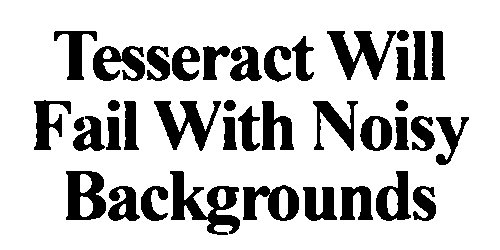

In [153]:
cv2_imshow(dilated_image)

In [161]:
# Removing Borders

def remove_borders(image):
  contours,heirarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2. CHAIN_APPROX_SIMPLE)
  contSorted =sorted(contours, key = lambda x:cv2.contourArea(x))
  cnt = contSorted[-1]
  x,y,w,h = cv2.boundingRect(cnt)
  crop = image[y:y+h,x:x+w]
  return (crop)

In [163]:
no_borders = remove_borders(dilated_image)

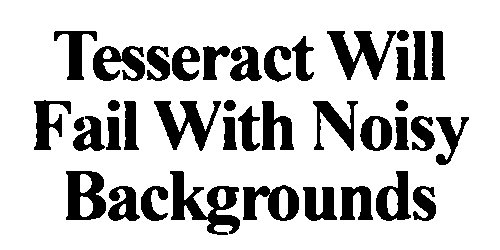

In [164]:
cv2_imshow(no_borders)

In [174]:
# Missing Borders
color = [255,255,255]

top, bottom, left, right = [100]*4

In [175]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value = color)

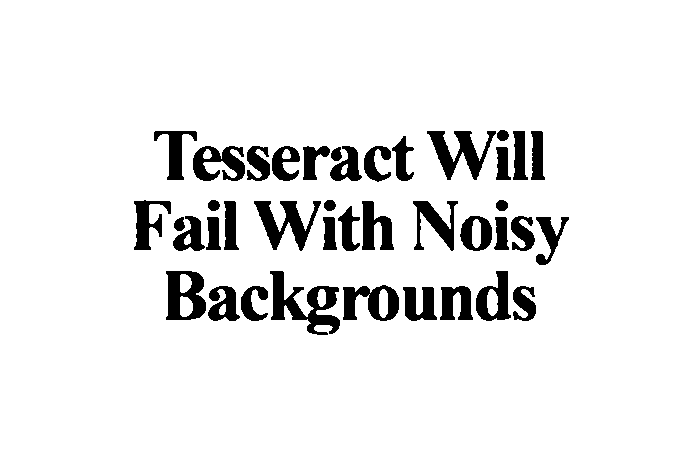

In [176]:
cv2_imshow(image_with_border)

In [ ]:
# Transparency/ Alpha Channel


In [ ]:
# Extracting the text

In [184]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,772 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [185]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [198]:
ocr_result = pytesseract.image_to_string(dilated_image)

In [199]:
ocr_result

'Tesseract Will\nFail With Noisy\nBackgrounds\n\x0c'

In [200]:
type(ocr_result)

str